# CNN Para correos de spam

Las Redes Neuronales Convolucionales (CNN) son una clase de modelos de deep learning que han demostrado ser extremadamente efectivas en tareas de visión por computadora, y que también han encontrado aplicaciones significativas en el procesamiento de texto y análisis de series temporales. En el contexto de la detección de spam en correos electrónicos, las CNN pueden ser adaptadas para analizar y aprender patrones dentro del texto que son indicativos de contenido no deseado o malicioso.



In [1]:
# import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import shap
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Flatten, Dropout

# Visualización de Resultados
import matplotlib.pyplot as plt

2024-05-14 17:16:10.408276: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [29]:
data = pd.read_csv('data/combined_data.csv')

data.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [30]:
X = data['text'].astype(str)  
y = data['label']

In [31]:
# Configura el Tokenizer y convierte los textos a secuencias
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

In [32]:
# Aplica padding a las secuencias
X_padded = pad_sequences(sequences, maxlen=5000)

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_padded, y, test_size=0.25, random_state=42)

In [33]:
train_sequences = X_train 
size = len(tokenizer.word_index) + 1
seq_len = max([len(seq) for seq in train_sequences])

In [34]:
model = Sequential()
model.add(Embedding(input_dim=size, output_dim=50, input_length=seq_len))
model.add(Conv1D(64, 5, activation='relu'))  # Capa Conv1D
model.add(GlobalMaxPooling1D())  # Reducir la dimensión para la capa Dense
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

/usr/local/Caskroom/miniforge/base/envs/ML/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_2          │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 608s 2s/step - accuracy: 0.8615 - loss: 0.2991 - val_accuracy: 0.9861 - val_loss: 0.0440
Epoch 2/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 570s 1s/step - accuracy: 0.9929 - loss: 0.0228 - val_accuracy: 0.9875 - val_loss: 0.0414
Epoch 3/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 571s 1s/step - accuracy: 0.9964 - loss: 0.0118 - val_accuracy: 0.9873 - val_loss: 0.0464
Epoch 4/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 554s 1s/step - accuracy: 0.9985 - loss: 0.0061 - val_accuracy: 0.9870 - val_loss: 0.0539
Epoch 5/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 549s 1s/step - accuracy: 0.9989 - loss: 0.0041 - val_accuracy: 0.9873 - val_loss: 0.0567
Epoch 6/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 548s 1s/step - accuracy: 0.9989 - loss: 0.0038 - val_accuracy: 0.9865 - val_loss: 0.0569
Epoch 7/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 547s 1s/step - accuracy: 0.9991 - loss: 0.0033 - val_accuracy: 0.9879 - val_loss: 0.0620
Epoch 8/10
392/392 ━━━━━━━━━━━━━━━━━━━━ 547s 1s/step - accuracy: 0.9991 - loss: 0.0039 - val_accu

In [36]:
# Evaluación del modelo
results = model.evaluate(X_val, y_val)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

652/652 ━━━━━━━━━━━━━━━━━━━━ 47s 73ms/step - accuracy: 0.9866 - loss: 0.0623
Test Loss: 0.05766945332288742, Test Accuracy: 0.9873453974723816


Los resultados obtenidos del modelo son muy buenos con un Test Accuracy de 0.9873 y un Test Loss de 0.057. Seguidamente se muestra un gráfico con todas las epochs entrenadas.

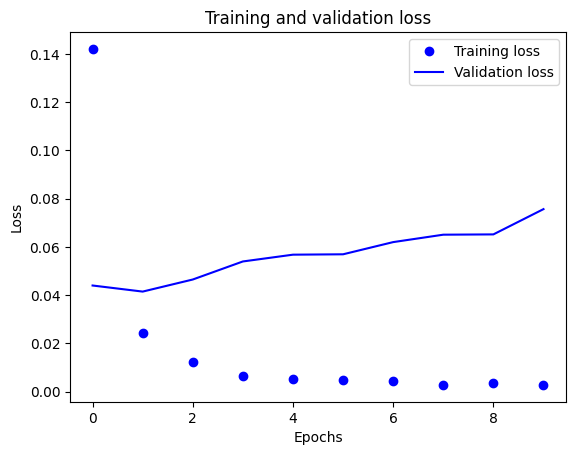

In [37]:
# Gráfico de la pérdida
plt.plot(history.history['loss'], 'bo', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

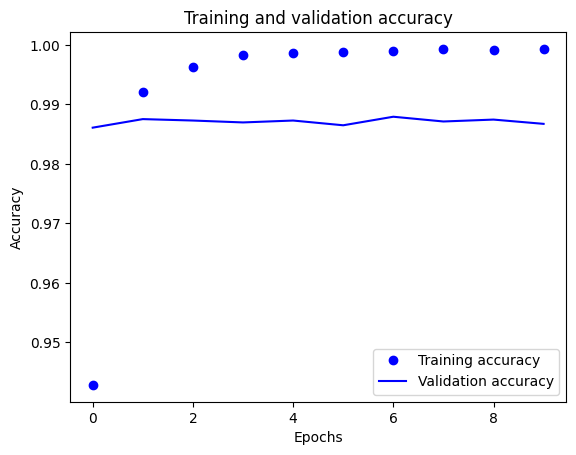

In [38]:
# Gráfico de la precisión
plt.plot(history.history['accuracy'], 'bo', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Variables importantes

Debido a la gran cantidad de datos calcular las variables importantes del X_val (20,862 registros) el calculo de tiempo estimado en entrenarse es de aproximadamente 1490 horas. Por ello, se intentó seleccionar un conjunto menor de horas. Esto tampoco funcionó ya que el tiempo de ejecución era demasiado largo.

In [53]:
# Determina el tamaño del subconjunto como un porcentaje del total
subset_size = int(0.01 * len(X_val))  # Cambiar tamaño del subconjunto

# Genera índices aleatorios
indices = np.random.choice(len(X_val), subset_size, replace=False)

# Selecciona el subconjunto usando los índices
X_val_subset = X_val[indices]

In [1]:
explainer = shap.Explainer(model.predict, X_val_subset)

shap_values = explainer(X_val_subset, max_evals=5857)

shap.plots.waterfall(shap_values[0])

NameError: name 'shap' is not defined

Una vez analizados los tres modelos se puede observar que CNN es el mejor modelo con unos resultados muy buenos de Test Accuracy: 0.9873 y Test Loss: 0.057